# BUSA3020 Programming Task 2  

**Assignment Final Marks**: Distinction Grade    




---
---
## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

In this notebook, I will work on a new dataset on 4,000 customers that has been collected through loyalty cards that customers use at checkout, it contains numerous details about customers' essential details including `Gender`, `Marital Status`, `Education`, `Settlement Size`, `Occupation`, `Income`, `Age`. The main task is to analyse the data in Python using relevant techniques including KMeans and Agglomerative methods, then identify customer segments given the dataset.


---
---


### 1. Exploratory Data Analysis (EDA)

In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform

In [2]:
# Read file and check null values
df = pd.read_csv("assignment_dataset.csv")
data = df.loc[:, 'Gender':'Age']

In [3]:
# Statistics
df.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.489500,0.510500,1.708250,1.090000,1.200750,134353.792250,39.946250
std,0.499952,0.499952,1.024155,0.869246,0.526326,48533.567076,10.269724
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,97815.250000,32.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,122607.000000,38.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,165920.250000,47.000000
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000


<Axes: title={'center': 'Customer data correlation matrix'}>

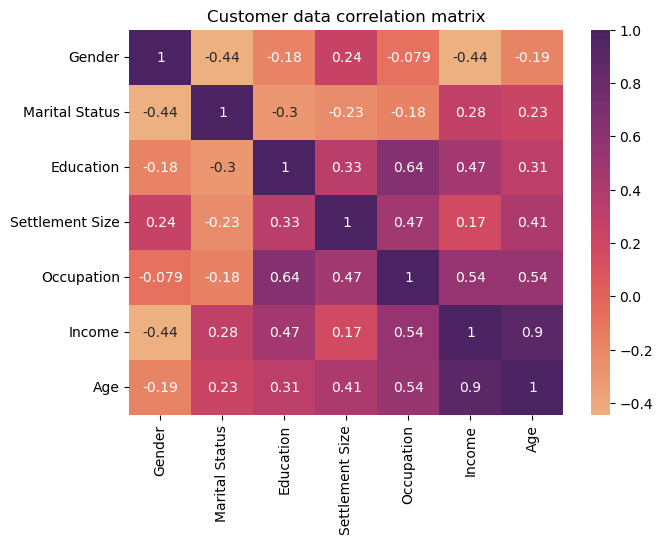

In [4]:
# Correlation
dat_corr = df.corr()
plt.figure(figsize = (7,5))
plt.title("Customer data correlation matrix")
sns.heatmap(data=dat_corr, annot=True, cmap = 'flare')

The picture shows that the bluer the color of the correlation, the stronger the positive correlation. And the redder the higher the negative correlation.
The image above has the same results as the table in the previous step, but the view of the data with a heat map is easier to understand.

Text(0.5, 1.0, 'Scatter Plot between Age and Income')

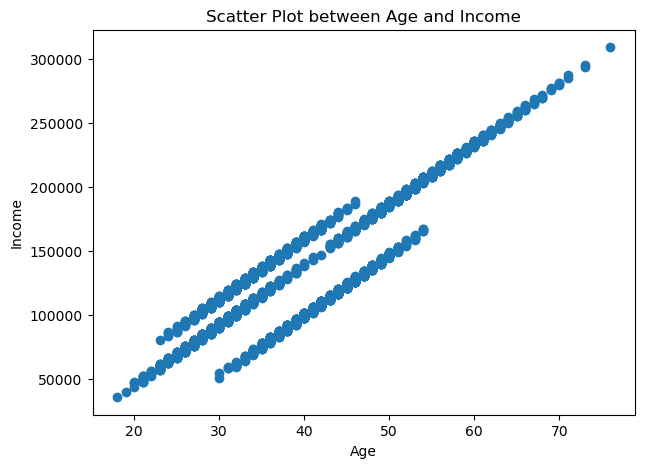

In [5]:
# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,6],df.iloc[:,5])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatter Plot between Age and Income")

In [6]:
# Encode categorical features
categories_encoded = OrdinalEncoder()

data['Gender'] = categories_encoded.fit_transform(df[['Gender']])
data['Marital Status'] = categories_encoded.fit_transform(df[['Marital Status']])
data['Education'] = categories_encoded.fit_transform(df[['Education']])
data['Settlement Size'] = categories_encoded.fit_transform(df[['Settlement Size']])
data['Occupation'] = categories_encoded.fit_transform(df[['Occupation']])

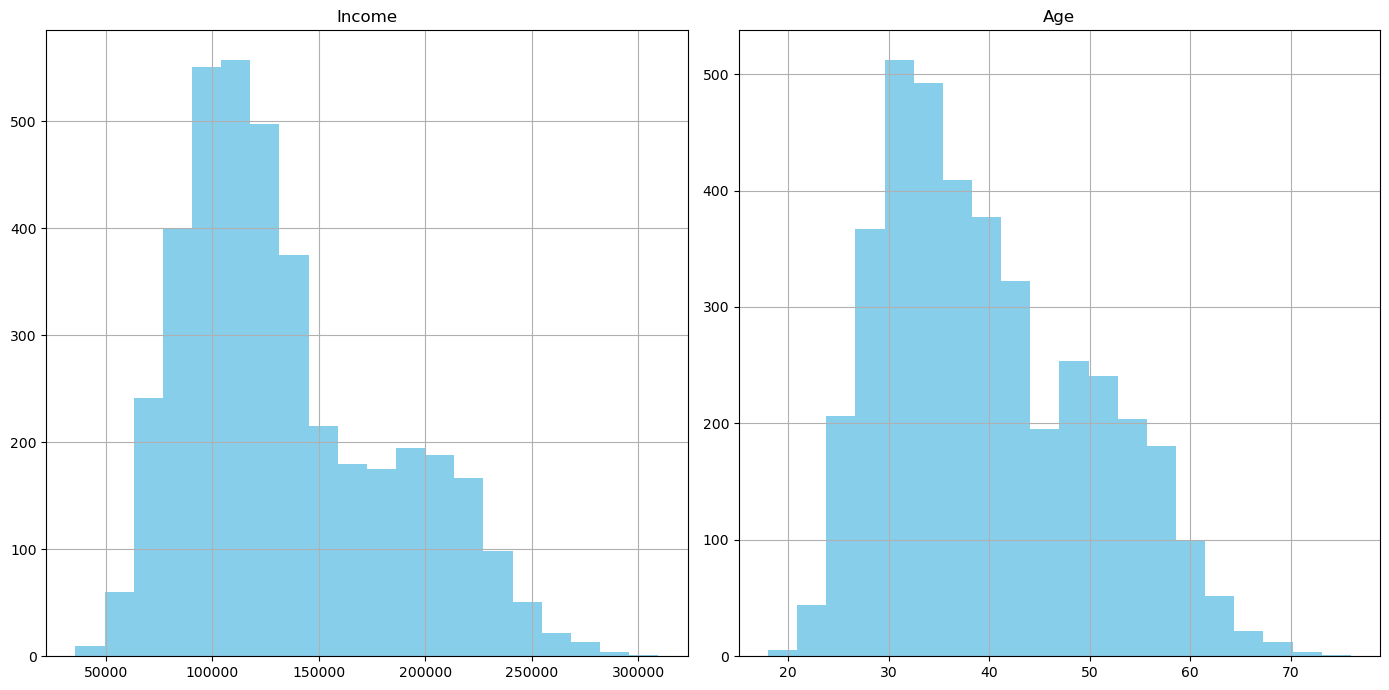

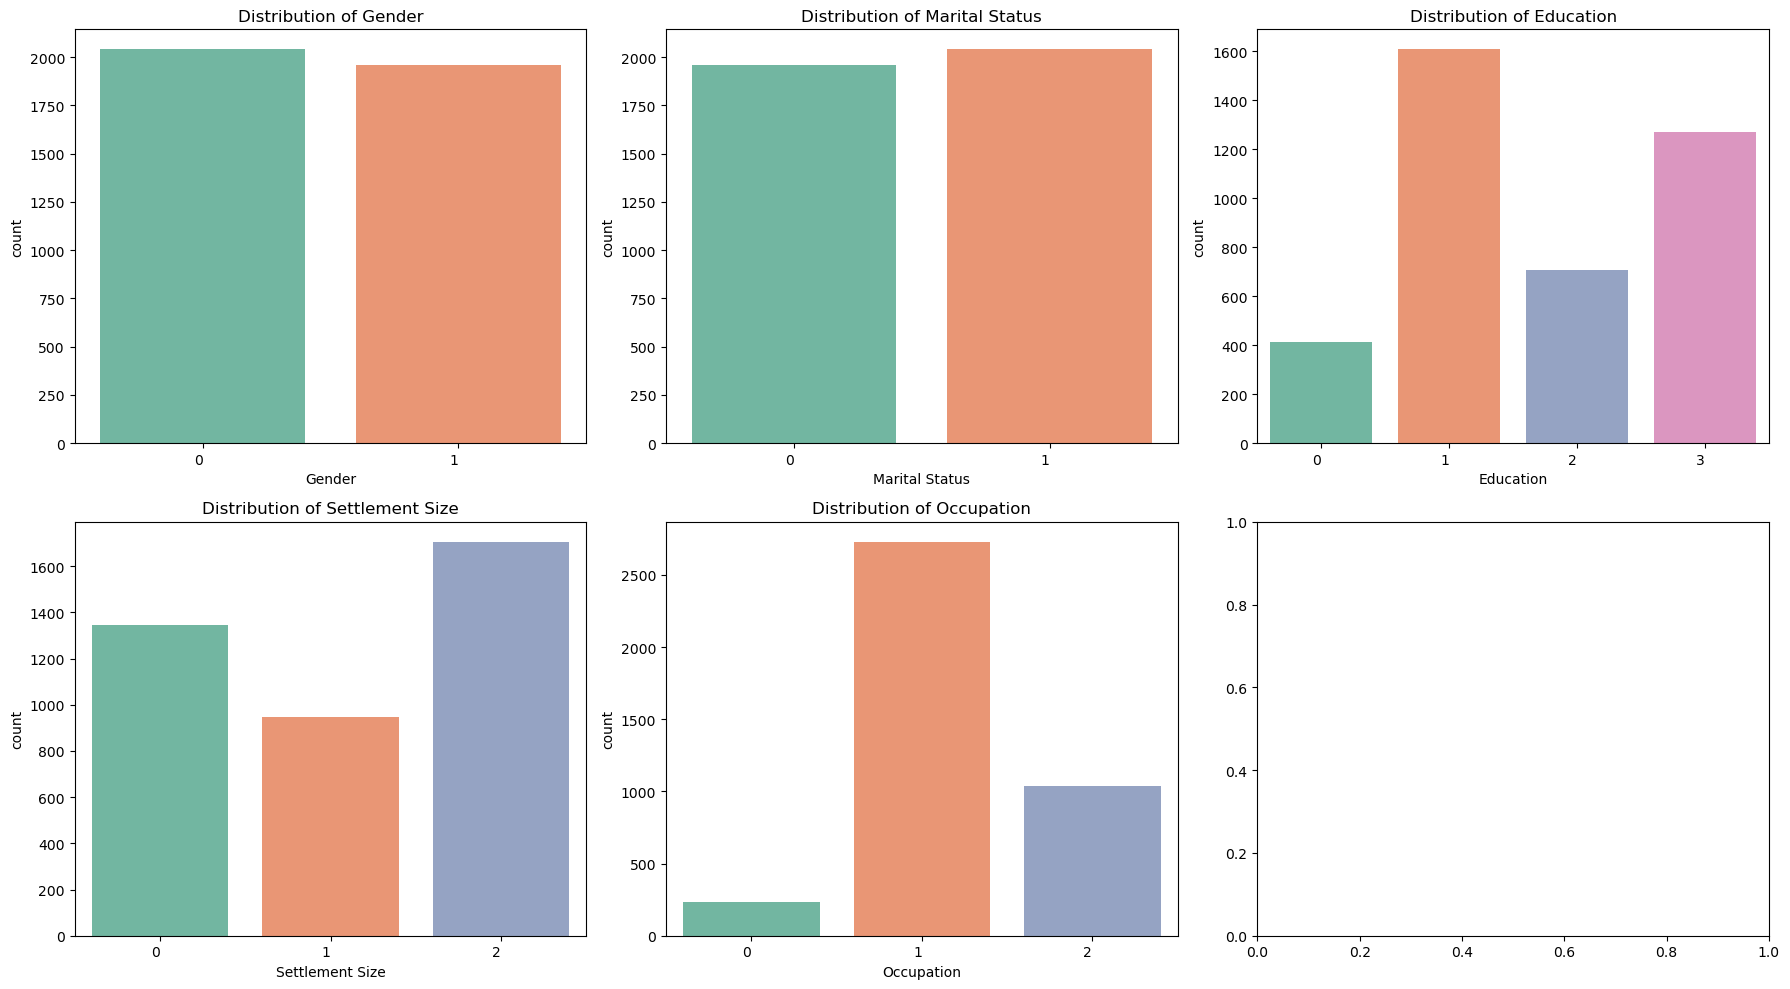

In [7]:
# Histograms for numerical variables
numerical_cols = ['Income', 'Age']
df[numerical_cols].hist(bins=20, figsize=(14, 7), layout=(1, 2), color='skyblue')
plt.tight_layout()
plt.show()

# Bar charts for categorical variables
categorical_cols = ['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=df, x=col, ax=ax, palette='Set2')
    ax.set_title(f'Distribution of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()

/var/folders/3b/zz2f2zgd4gb_nd50pb19k83c0000gn/T/ipykernel_38516/848209821.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


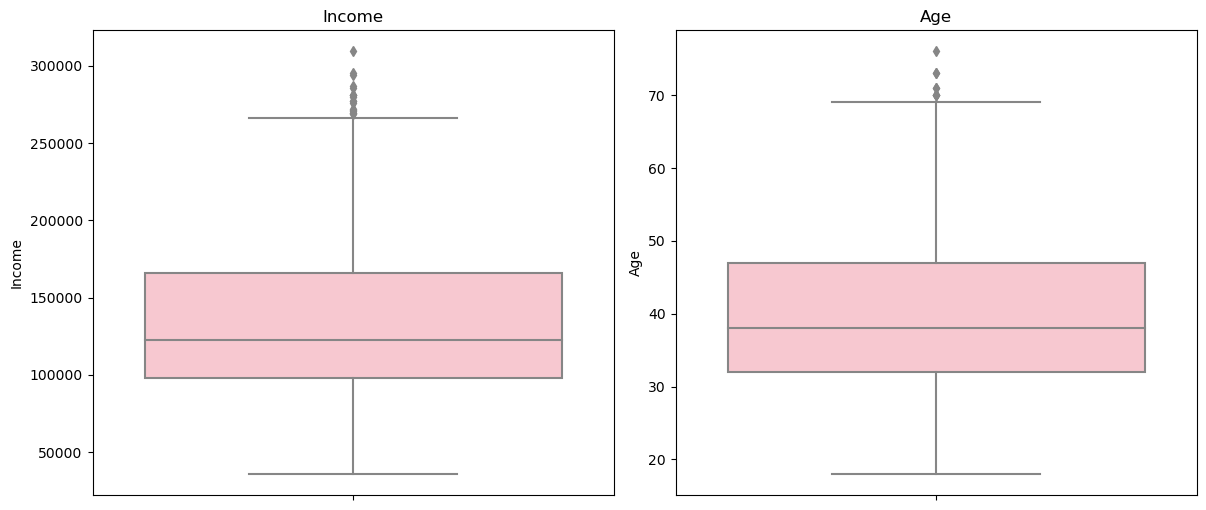

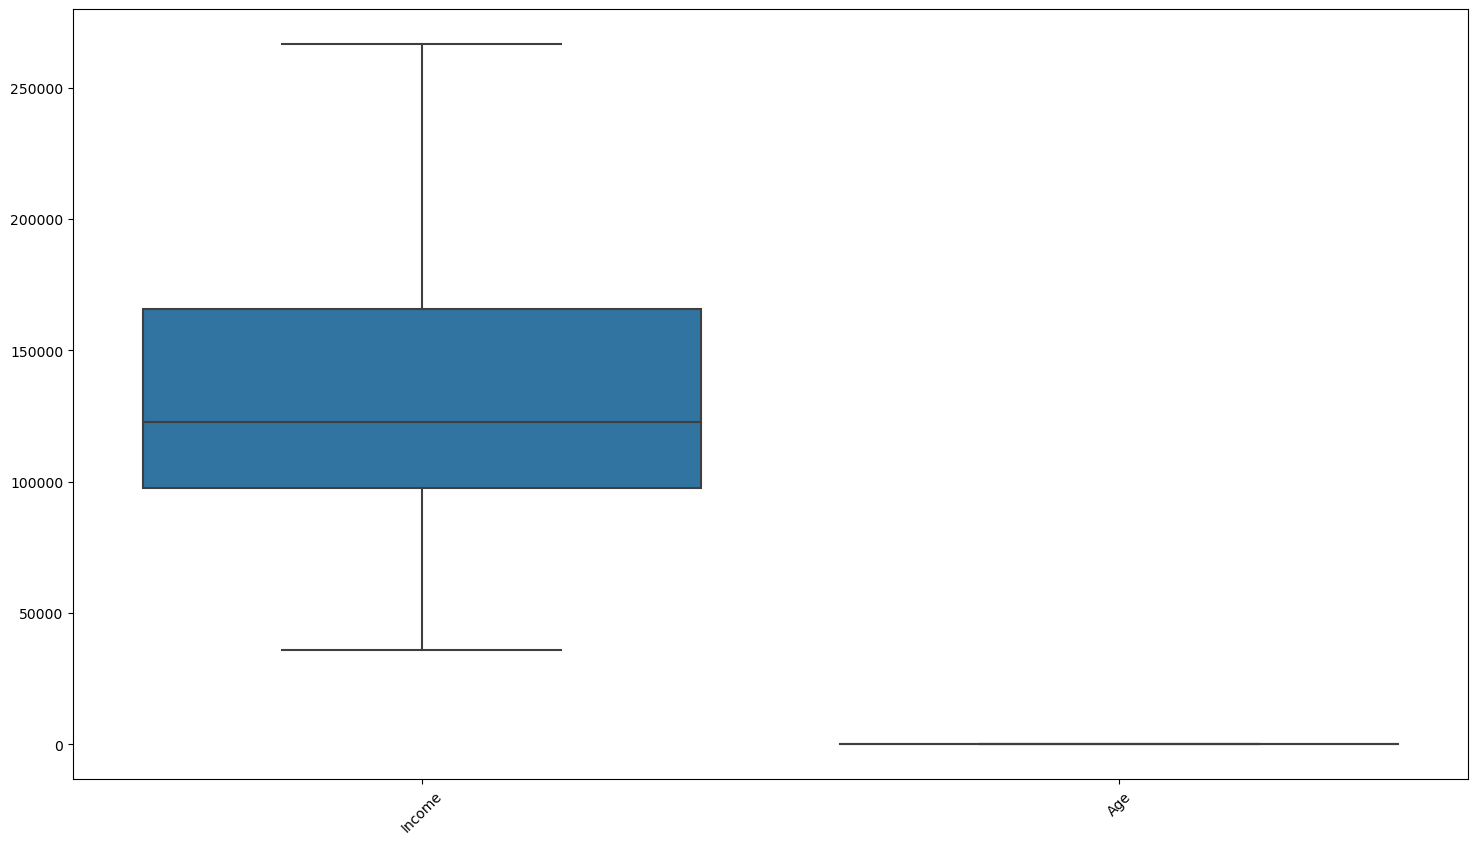

Gender             0
Marital Status     0
Education          0
Settlement Size    0
Occupation         0
Income             0
Age                0
dtype: int64


In [8]:
# Cleaning outliers
# Select numerical columns for boxplot
numerical_cols = ['Income', 'Age']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create boxplots for each numerical column -> Check outliers first
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='pink')
    plt.title(col)
    plt.tight_layout()

plt.show()

# Removing outliers
plt.figure(figsize=(18,10))
sns.boxplot(data = df[numerical_cols], showfliers = False) # Remove outliers
plt.xticks(rotation = 45)
plt.show()

print(df.isnull().sum()) # Check null values after filtering all outliers


### 2. Customer Segmentation

#### 2.1. Standardise Data

In [29]:
sc = StandardScaler()
data[['Income', 'Age']] = sc.fit_transform(df[['Income', 'Age']])

print(data[['Income', 'Age']])
df

        Income       Age
0     1.056251  0.979092
1    -0.403396 -0.968623
2    -0.032266 -0.579080
3     1.552052  1.466021
4    -0.324781  0.394778
...        ...       ...
3995  1.740502  1.660793
3996 -0.317836 -0.871237
3997  0.337339 -0.189537
3998  0.142130 -0.384309
3999 -1.035986 -1.163395

[4000 rows x 2 columns]


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,185611,50
1,0,1,1,0,1,114778,30
2,0,1,1,0,0,132788,34
3,0,1,3,2,2,209671,55
4,1,1,1,2,1,118593,44
...,...,...,...,...,...,...,...
3995,0,1,3,2,2,218816,57
3996,0,1,1,0,1,118930,31
3997,0,1,1,0,1,150724,38
3998,0,1,1,0,1,141251,36


In [30]:
X = df[['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation', 'Income', 'Age']]
#X

#### 2.2 Determine optimal K

***a. Elbow Method***

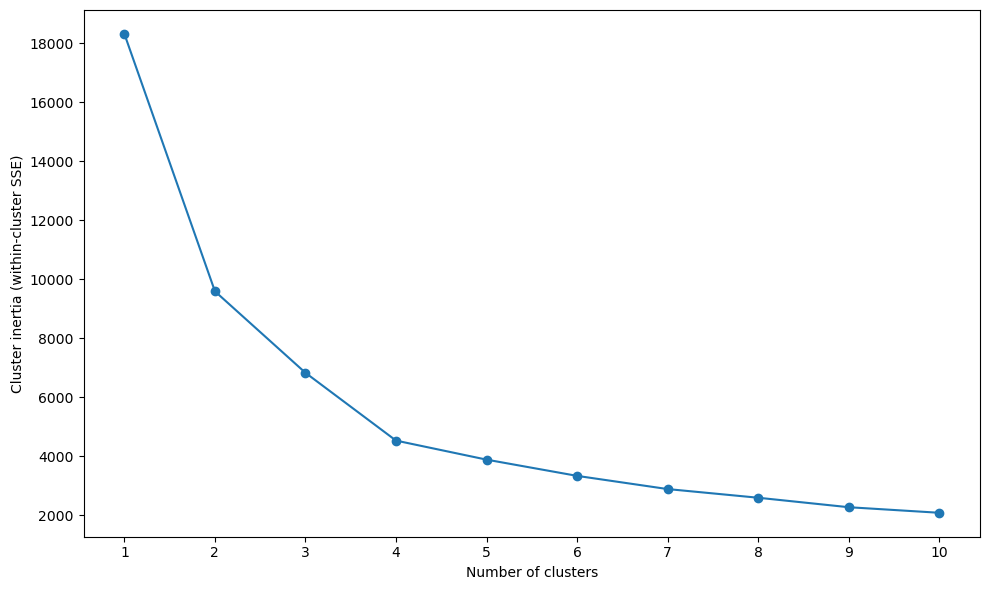

[18323.043500000007,
 9595.405770184563,
 6831.567531806359,
 4533.038346950164,
 3887.0844051974022,
 3336.5584602243334,
 2889.1319862916885,
 2595.085263081332,
 2273.9774636814577,
 2085.0441946471446]

In [11]:
# Elbow Method for K-means
#X = df.loc[:, 'Gender':'Age'].values
#print(X)
inertias = [] # empty list
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(data)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()
inertias

***b. Silhouette Analysis***

[0 1]
silhouette_vals
 [0.63945016 0.56031114 0.5082508  ... 0.46767098 0.51081777 0.38143883]
silhouette_avg: 0.48


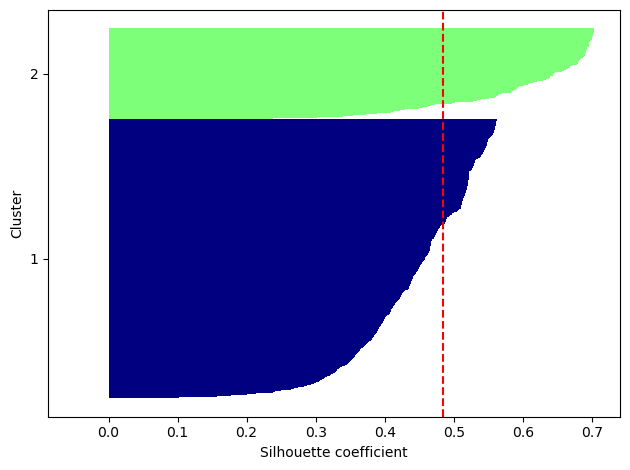

In [12]:
# Silhouette Analysis with n_clusters = 2 

km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(data)
#print(y_km)

cluster_labels = np.unique(y_km)
print(cluster_labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

[0 1 2]
silhouette_vals
 [0.62751624 0.51448327 0.51975626 ... 0.62599682 0.63844066 0.3365633 ]
silhouette_avg: 0.42


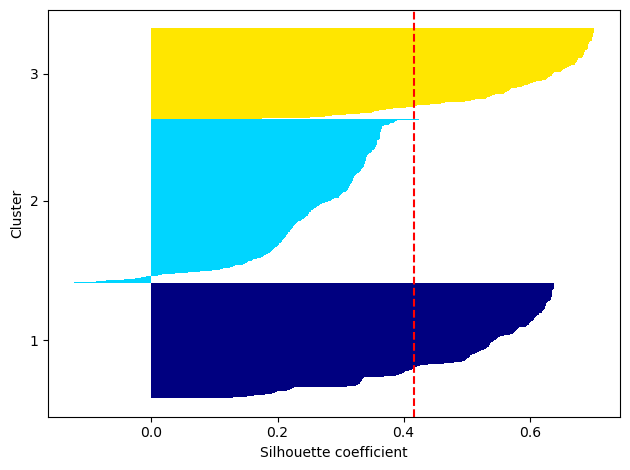

In [13]:
# Silhouette Analysis with n_clusters = 3 

km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(data)
#print(y_km)

cluster_labels = np.unique(y_km)
print(cluster_labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

[0 1 2 3]
silhouette_vals
 [0.62105676 0.47466271 0.51017122 ... 0.62711332 0.63273502 0.59756771]
silhouette_avg: 0.50


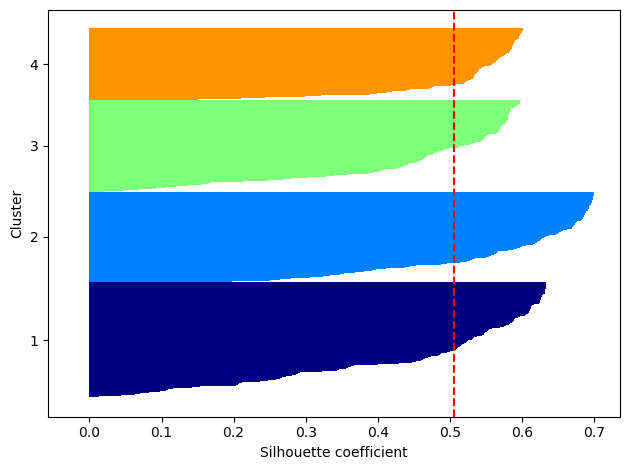

In [14]:
# Silhouette Analysis with n_clusters = 4

km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(data)
#print(y_km)

cluster_labels = np.unique(y_km)
print(cluster_labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### 3. Estimating clusters using KMeans++ and Agglomerative method

#### 3.1. Using KMeans++

In [15]:
# KMeans++ clustering

from sklearn.cluster import KMeans

km_plus = KMeans(n_clusters=4, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(data)

#print(y_km_plus)
#print(f'\nClusters:\n {km_plus.cluster_centers_}')

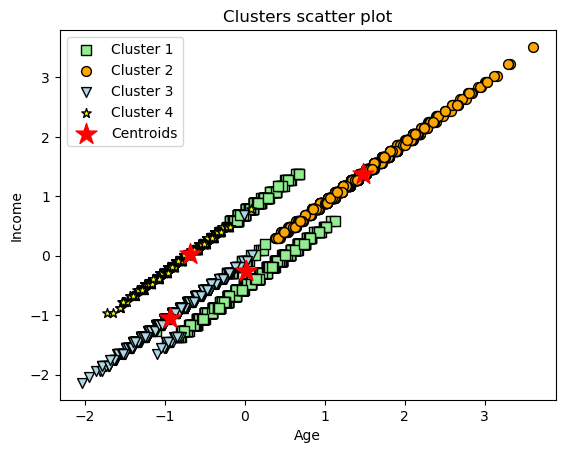

In [16]:
X = data[['Income', 'Age']]
X = X.values
#print("Shape of X:", X.shape)
#print("Shape of y_km_plus:", y_km_plus.shape)
#print(data)

# Plot the clusters
plt.scatter(X[y_km_plus == 0, 0], X[y_km_plus == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km_plus == 1, 0], X[y_km_plus == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km_plus == 2, 0], X[y_km_plus == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_km_plus == 3, 0], X[y_km_plus == 3, 1], s=50, c='yellow', marker='*', edgecolor='black', label='Cluster 4')

# Plot the centroids
plt.scatter(km_plus.cluster_centers_[:, 5], km_plus.cluster_centers_[:, 6], s=250, marker='*', c='red', label='Centroids')

# Add titles and labels
plt.title('Clusters scatter plot')
plt.legend(scatterpoints=1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

***Provide table presenting the cluster centers (all 7 variables) and customer counts for KMeans++ clustering method***

In [17]:
# Table presenting the cluster centers (all 7 variables) for KMeans:
import pandas as pd

# Define the cluster centers provided
cluster_centers = [
    [0.26571201, 0.82736675, 0.9451074, 0.01909308, 0.83373111, 0.01659906, -0.26251829],
    [0.30942623, 0.44057377, 3.0, 1.81352459, 1.88934426, 1.47217276, 1.37402349],
    [0.63141994, 0.13293051, 2.27693857, 1.02618328, 1.16314199, -0.93016553, -1.04227556],
    [0.89793282, 0.56847545, 0.58914729, 1.99870801, 0.97674419, -0.6899887, 0.03090205]
]

# Define the variable names
variables = ['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation', 'Income', 'Age']

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=variables)

# Print the DataFrame
print("Table presenting the cluster centers for the seven variables:")
cluster_centers_df

Table presenting the cluster centers for the seven variables:


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0.265712,0.827367,0.945107,0.019093,0.833731,0.016599,-0.262518
1,0.309426,0.440574,3.000000,1.813525,1.889344,1.472173,1.374023
2,0.631420,0.132931,2.276939,1.026183,1.163142,-0.930166,-1.042276
3,0.897933,0.568475,0.589147,1.998708,0.976744,-0.689989,0.030902


In [18]:
km_plus_df = pd.DataFrame(km_plus.cluster_centers_, columns =['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation', 'Income','Age'])
km_plus_df.index.name = 'Cluster'
km_plus_df.reset_index(inplace = True)

In [19]:
data_kmeans = df.copy() # copy the original data 
data_kmeans['cluster'] = km_plus.labels_

data_kmeans_st = data.copy() # copy the original data (standardised version)
data_kmeans_st['cluster'] = km_plus.labels_

In [20]:
data_kmeans_ana = data_kmeans.groupby('cluster').mean()
#data_kmeans_ana
data_kmeans_ana_st = data_kmeans_st.groupby('cluster').mean()

In [21]:
# Adding customer count column (original data)
data_kmeans_ana['customer counts'] = data_kmeans[['cluster', 'Gender']].groupby(['cluster']).count()
data_kmeans_ana

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,customer counts
cluster,,,,,,,,
0,0.265712,0.827367,0.945107,0.019093,0.833731,135159.303103,37.250597,1257
1,0.309426,0.440574,3.000000,1.813525,1.889344,205794.655738,54.055328,976
2,0.631420,0.132931,2.276939,1.026183,1.163142,89215.184290,29.243706,993
3,0.897933,0.568475,0.589147,1.998708,0.976744,100870.365633,40.263566,774


In [22]:
# Standardised data version
data_kmeans_ana_st['customer counts'] = data_kmeans[['cluster', 'Gender']].groupby(['cluster']).count()
data_kmeans_ana_st

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,customer counts
cluster,,,,,,,,
0,0.265712,0.827367,0.945107,0.019093,0.833731,0.016599,-0.262518,1257
1,0.309426,0.440574,3.000000,1.813525,1.889344,1.472173,1.374023,976
2,0.631420,0.132931,2.276939,1.026183,1.163142,-0.930166,-1.042276,993
3,0.897933,0.568475,0.589147,1.998708,0.976744,-0.689989,0.030902,774


#### 3.2. Using Agglomerative method

In [23]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(data.values, metric='euclidean'), method='complete')

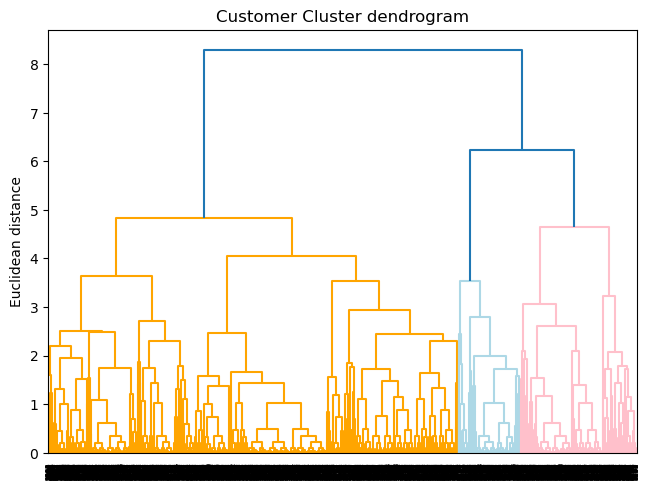

In [24]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import set_link_color_palette

set_link_color_palette(['orange', 'lightblue', 'pink', 'gray'])

dendrogram(row_clusters)
#plt.axhline(y=4, color='r', linestyle='--')
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.title('Customer Cluster dendrogram')
plt.show()

In [25]:
ac = AgglomerativeClustering(n_clusters=4, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 2 3 ... 3 3 2]


/Users/nguyet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
# Agglomerative method
data_agg = df.copy() # copy the original data 
data_agg['cluster'] = ac.labels_

data_agg_ana = data_agg.groupby('cluster').mean()
data_agg_ana['customer counts'] = data_agg[['cluster', 'Gender']].groupby(['cluster']).count()
data_agg_ana

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,customer counts
cluster,,,,,,,,
0,0.082305,0.995885,2.987654,1.868313,1.888889,240571.674897,61.460905,243
1,0.425711,0.366702,2.503688,1.387777,1.657534,185768.228662,50.452055,949
2,0.570911,0.336753,1.650573,0.943271,1.036210,94218.529270,30.774291,1657
3,0.510860,0.776716,0.865334,0.891399,0.915725,127317.202433,39.946134,1151


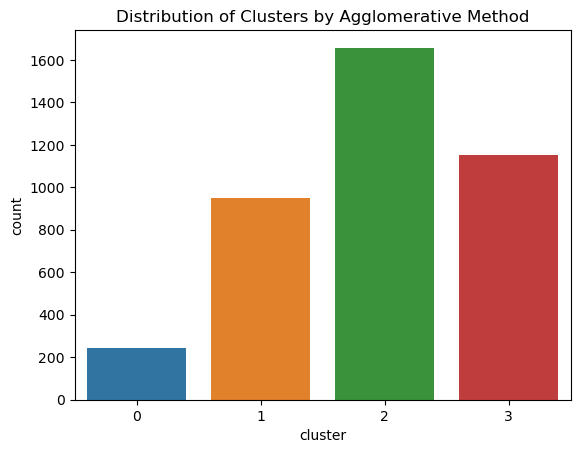

In [27]:
pl = sns.countplot(x=data_agg['cluster'])
pl.set_title('Distribution of Clusters by Agglomerative Method')
plt.show()